In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/unb-cic-iot-dataset/wataiData/csv/CICIoT2023'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unb-cic-iot-dataset/wataiData/csv/CICIoT2023/part-00128-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
/kaggle/input/unb-cic-iot-dataset/wataiData/csv/CICIoT2023/part-00089-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
/kaggle/input/unb-cic-iot-dataset/wataiData/csv/CICIoT2023/part-00034-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
/kaggle/input/unb-cic-iot-dataset/wataiData/csv/CICIoT2023/part-00042-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
/kaggle/input/unb-cic-iot-dataset/wataiData/csv/CICIoT2023/part-00160-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
/kaggle/input/unb-cic-iot-dataset/wataiData/csv/CICIoT2023/part-00096-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
/kaggle/input/unb-cic-iot-dataset/wataiData/csv/CICIoT2023/part-00110-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
/kaggle/input/unb-cic-iot-dataset/wataiData/csv/CICIoT2023/part-00078-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
/kaggle/input/unb-cic-iot-dataset/wataiData/csv/CICIoT2023/part-00113-36

### Importing all the necessary modules

In [2]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
DATASET_DIRECTORY = '/kaggle/input/unb-cic-iot-dataset/wataiData/csv/CICIoT2023/'

# Find all CSV files in the dataset directory and sort them
df_sets = [k for k in os.listdir(DATASET_DIRECTORY) if k.endswith('.csv')]
df_sets.sort()

data_sets = df_sets[:int(len(df_sets)*.65)]
part2 = df_sets[int(len(df_sets)*.8):]
len(df_sets)


169

In [4]:
# Read the last csv from training sets into a dataframe
df = pd.read_csv(DATASET_DIRECTORY + df_sets[-1])


# Print the number of rows and columns in the dataframe
print('Rows: {}'.format(df.shape[0]))
print('Columns: {}'.format(df.shape[1]))

# Print the first 5 rows of the dataframe
df.head()

Rows: 234745
Columns: 47


,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,110.797744,110.797744,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.307619e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-TCP_Flood
1,0.006453,182.88,16.67,63.60,30.905833,30.905833,0.0,0.0,0.0,0.0,...,3.072377,162.87,8.300739e+07,9.5,18.010237,4.370333,209.623265,0.05,141.55,DoS-UDP_Flood
2,31.739927,7382.93,3.23,80.15,8.923224,8.923224,0.0,0.0,0.0,0.0,...,532.284695,637.09,8.328373e+07,9.5,35.140754,752.738781,306225.702126,0.94,141.55,DDoS-ICMP_Fragmentation
3,0.000000,54.00,6.00,64.00,1.697796,1.697796,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.307650e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-TCP_Flood
4,0.000000,54.00,6.00,64.00,1.471092,1.471092,0.0,1.0,0.0,1.0,...,0.000000,54.00,8.334428e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood


In [5]:
# columns used in all the csv files
X_columns = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration',
       'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count',
       'syn_count', 'fin_count', 'urg_count', 'rst_count', 
    'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP',
       'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
       'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue',
       'Radius', 'Covariance', 'Variance', 'Weight', 
]
y_column = 'label'

In [6]:
# Show the number of unique values in the y_column
print('Unique values in y_column: {}'.format(len(df[y_column].unique())))

# Print them out
print(df[y_column].unique())

# Save them as attack_labels
attack_labels = df[y_column].unique()

Unique values in y_column: 34
['DDoS-TCP_Flood' 'DoS-UDP_Flood' 'DDoS-ICMP_Fragmentation'
 'DDoS-RSTFINFlood' 'BenignTraffic' 'DDoS-SynonymousIP_Flood'
 'DDoS-UDP_Flood' 'DDoS-ICMP_Flood' 'DoS-TCP_Flood' 'DDoS-PSHACK_Flood'
 'DDoS-SYN_Flood' 'DoS-SYN_Flood' 'MITM-ArpSpoofing' 'DDoS-SlowLoris'
 'Mirai-greeth_flood' 'Mirai-udpplain' 'Recon-PortScan'
 'DDoS-UDP_Fragmentation' 'Mirai-greip_flood' 'DDoS-ACK_Fragmentation'
 'Recon-HostDiscovery' 'Recon-PingSweep' 'DNS_Spoofing' 'DoS-HTTP_Flood'
 'SqlInjection' 'DictionaryBruteForce' 'Backdoor_Malware' 'Recon-OSScan'
 'DDoS-HTTP_Flood' 'VulnerabilityScan' 'BrowserHijacking'
 'CommandInjection' 'XSS' 'Uploading_Attack']


In [7]:
# Creating a dictionary of attack types for 33 attack classes + 1 for benign traffic
dict_34_classes = {'BenignTraffic': 0 ,
                    'DDoS-RSTFINFlood' :1, 'DDoS-PSHACK_Flood':2,  'DDoS-SYN_Flood':3, 'DDoS-UDP_Flood':4, 'DDoS-TCP_Flood':5, 
                    'DDoS-ICMP_Flood':6, 'DDoS-SynonymousIP_Flood':7, 'DDoS-ACK_Fragmentation':8, 'DDoS-UDP_Fragmentation':9, 'DDoS-ICMP_Fragmentation':10, 
                    'DDoS-SlowLoris':11, 'DDoS-HTTP_Flood':12, 'DoS-UDP_Flood':13, 'DoS-SYN_Flood':14, 'DoS-TCP_Flood':15, 'DoS-HTTP_Flood':16,                 # DDoS and DoS
                    'Mirai-greeth_flood': 17, 'Mirai-greip_flood': 18, 'Mirai-udpplain': 19,                                                                    # Mirai 
                    'Recon-PingSweep': 20, 'Recon-OSScan': 21, 'Recon-PortScan': 22, 'VulnerabilityScan': 23, 'Recon-HostDiscovery': 24,                        # Reconnaissance
                    'DNS_Spoofing': 25, 'MITM-ArpSpoofing': 26,                                                                                                 # Spoofing
                    'BrowserHijacking': 27, 'Backdoor_Malware': 28, 'XSS': 29, 'Uploading_Attack': 30, 'SqlInjection': 31, 'CommandInjection': 32,              # Web
                    'DictionaryBruteForce': 33}                                                                                                                 # Brute Force 

dict_7_classes = {  0: 0 ,
                    1 :1, 2:1,  3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1, 11:1, 12:1, 13:1, 14:1, 15:1, 16:1,                                                    # DDoS and DoS                    
                    17: 2, 18: 2, 19: 2,                                                                                                                        # Mirai
                    20: 3, 21: 3, 22: 3, 23: 3, 24: 3,                                                                                                          # Reconnaissance
                    25: 4, 26: 4,                                                                                                                               # Spoofing
                    27: 5, 28: 5, 29: 5, 30: 5, 31: 5, 32: 5,                                                                                                   # Web
                    33: 6}                                                                                                                                      # Brute Force

dict_2_classes = {  0: 0 ,
                    1 :1, 2:1,  3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1, 11:1, 12:1, 13:1, 14:1, 15:1, 16:1,                                                    # DDoS and DoS  
                    17: 1, 18: 1, 19: 1,                                                                                                                        # Mirai 
                    20: 1, 21: 1, 22: 1, 23: 1, 24: 1,                                                                                                          # Reconnaissance
                    25: 1, 26: 1,                                                                                                                               # Spoofing
                    27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1,                                                                                                   # Web
                    33: 1}                                                                                                                                      # Brute Force

# Map y column to the dict_34_classes values
df['label'] = df['label'].map(dict_34_classes)

In [8]:
# x values only

df = []

count = 0
for data_set in tqdm(data_sets):
    if count == 0:
        df = pd.read_csv(DATASET_DIRECTORY + data_set)
    else:
        df_new = pd.read_csv(DATASET_DIRECTORY + data_set)
        df = pd.concat([df, df_new], ignore_index=True)
    count = count + 1


100%|██████████| 109/109 [10:18<00:00,  5.67s/it]


In [9]:
df_p = []

count = 0
for data_set in tqdm(part2):
    if count == 0:
        dfn = pd.read_csv(DATASET_DIRECTORY + data_set)
    else:
        df_neww = pd.read_csv(DATASET_DIRECTORY + data_set)
        df_p = pd.concat([dfn, df_neww], ignore_index=True)
    count = count + 1

100%|██████████| 34/34 [01:59<00:00,  3.51s/it]


<Axes: xlabel='label'>

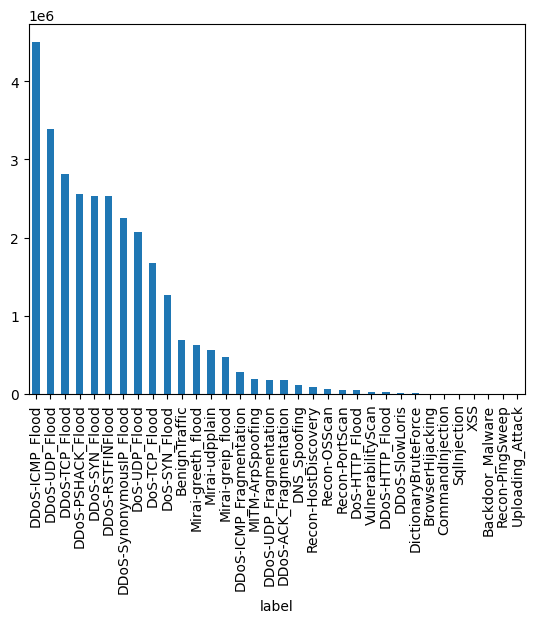

In [10]:
df.label.value_counts().plot.bar()

In [11]:
df.label.value_counts()

label
DDoS-ICMP_Flood            4504518
DDoS-UDP_Flood             3387233
DDoS-TCP_Flood             2812980
DDoS-PSHACK_Flood          2559887
DDoS-SYN_Flood             2537999
DDoS-RSTFINFlood           2530830
DDoS-SynonymousIP_Flood    2251744
DoS-UDP_Flood              2076650
DoS-TCP_Flood              1671786
DoS-SYN_Flood              1268370
BenignTraffic               687403
Mirai-greeth_flood          619766
Mirai-udpplain              556769
Mirai-greip_flood           470445
DDoS-ICMP_Fragmentation     282451
MITM-ArpSpoofing            192786
DDoS-UDP_Fragmentation      180077
DDoS-ACK_Fragmentation      178731
DNS_Spoofing                111691
Recon-HostDiscovery          83928
Recon-OSScan                 61405
Recon-PortScan               51246
DoS-HTTP_Flood               45041
VulnerabilityScan            23347
DDoS-HTTP_Flood              18040
DDoS-SlowLoris               14557
DictionaryBruteForce          8152
BrowserHijacking              3699
CommandInjecti

In [12]:
m0 = df[df != 'BenignTraffic']

In [13]:
combine = pd.concat([df[df['label'] == 'DDoS-ICMP_Flood'].sample(frac=0.01), df[df['label'] =='DDoS-UDP_Flood'].sample(frac=0.01), df[df['label'] =='DDoS-TCP_Flood'].sample(frac=0.01),
                    df[df['label'] =='DDoS-PSHACK_Flood'].sample(frac=0.01), df[df['label'] =='DDoS-SYN_Flood'].sample(frac=0.01), df[df['label'] =='DDoS-RSTFINFlood'].sample(frac=0.01),
                    df[df['label'] =='DoS-UDP_Flood'].sample(frac=0.01), df[df['label'] =='DoS-TCP_Flood'].sample(frac=0.01), df[df['label'] =='DoS-SYN_Flood'].sample(frac=0.01),
                    df[df['label'] =='DDoS-SynonymousIP_Flood'].sample(frac=0.01), df[df['label'] =='Mirai-greeth_flood'].sample(frac=0.01), df[df['label'] =='Mirai-udpplain'].sample(frac=0.01), 
                    df[df['label'] =='Mirai-greip_flood'].sample(frac=0.01), df[df['label'] =='DDoS-ICMP_Fragmentation'].sample(frac=0.01), df[df['label'] =='DDoS-ACK_Fragmentation'].sample(frac=0.01),
                    df[df['label'] =='MITM-ArpSpoofing'].sample(frac=0.01), df[df['label'] =='DDoS-UDP_Fragmentation'].sample(frac=0.01), df[df['label'] =='DNS_Spoofing'].sample(frac=0.01),
                    df[df['label'] =='Recon-HostDiscovery'].sample(frac=0.01),df[df['label'] =='Recon-OSScan'].sample(frac=0.01), df[df['label'] =='Recon-PortScan'].sample(frac=0.01), 
                    df[df['label'] =='DoS-HTTP_Flood'].sample(frac=0.01), df[df['label'] =='VulnerabilityScan'].sample(frac=0.01), df[df['label'] =='DDoS-HTTP_Flood'].sample(frac=0.01),
                    df[df['label'] =='DDoS-SlowLoris'].sample(frac=0.01), df[df['label'] =='DictionaryBruteForce'].sample(frac=0.01), df[df['label'] =='XSS'].sample(frac=0.01),
                    df[df['label'] =='Backdoor_Malware'].sample(frac=0.01), df[df['label'] =='SqlInjection'].sample(frac=0.01), df[df['label'] =='Recon-PingSweep'].sample(frac=0.01), 
                    df[df['label'] =='Uploading_Attack'].sample(frac=0.01), df[df['label'] =='DDoS-ACK_Fragmentation'].sample(frac=0.01), df[df['label'] =='BenignTraffic']],
                   ignore_index=True, axis=0).reset_index(drop=True)

In [14]:
combine

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.0,1.0,64.0,3.679220,3.679220,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.314957e+07,9.5,9.165151,0.000000,0.000000e+00,0.0,141.55,DDoS-ICMP_Flood
1,0.000000,0.0,1.0,64.0,12.076129,12.076129,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.314935e+07,9.5,9.165151,0.000000,0.000000e+00,0.0,141.55,DDoS-ICMP_Flood
2,0.000000,0.0,1.0,64.0,0.473445,0.473445,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.315071e+07,9.5,9.165151,0.000000,0.000000e+00,0.0,141.55,DDoS-ICMP_Flood
3,0.000000,0.0,1.0,64.0,5.405545,5.405545,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.312908e+07,9.5,9.165151,0.000000,0.000000e+00,0.0,141.55,DDoS-ICMP_Flood
4,0.000000,0.0,1.0,64.0,35.067672,35.067672,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.312778e+07,9.5,9.165151,0.000000,0.000000e+00,0.0,141.55,DDoS-ICMP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974287,237.415623,6036.0,9.8,100.3,3.302232,3.302232,0.0,0.0,0.0,0.0,...,105.335728,160.3,2.689350e-02,5.5,16.729657,148.967215,1.246416e+04,0.9,38.50,BenignTraffic
974288,0.464722,1285392.0,6.0,99.4,2440.531844,2440.531844,0.0,0.0,0.0,0.0,...,1501.404667,1880.8,1.665177e+08,13.5,54.154441,2123.580682,2.256895e+06,1.0,244.60,BenignTraffic
974289,74.282841,4713174.8,6.0,181.2,62.883083,62.883083,0.0,0.0,0.0,0.0,...,530.492897,229.8,2.277017e-03,5.5,30.536903,750.230250,3.222782e+05,0.9,38.50,BenignTraffic
974290,6.155579,1430.1,12.5,55.8,20.907593,20.907593,0.0,0.0,0.0,0.0,...,75.514954,97.1,1.665254e+08,13.5,14.240824,106.954518,5.732703e+03,1.0,244.60,BenignTraffic


<Axes: xlabel='label'>

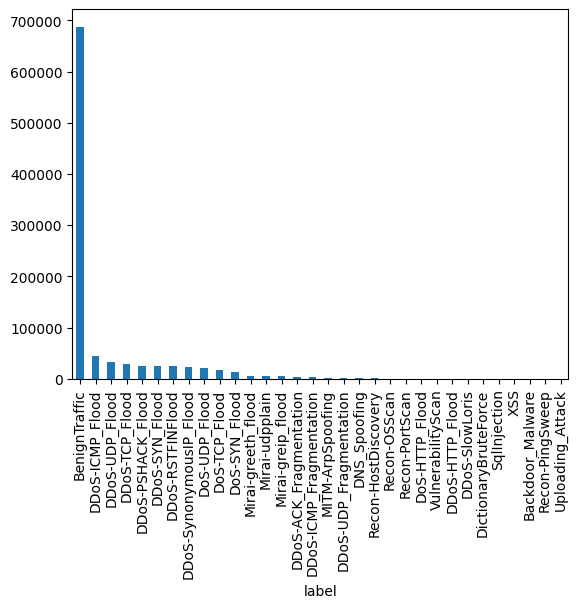

In [15]:
combine.label.value_counts().plot.bar()

In [16]:
df.label.value_counts()

label
DDoS-ICMP_Flood            4504518
DDoS-UDP_Flood             3387233
DDoS-TCP_Flood             2812980
DDoS-PSHACK_Flood          2559887
DDoS-SYN_Flood             2537999
DDoS-RSTFINFlood           2530830
DDoS-SynonymousIP_Flood    2251744
DoS-UDP_Flood              2076650
DoS-TCP_Flood              1671786
DoS-SYN_Flood              1268370
BenignTraffic               687403
Mirai-greeth_flood          619766
Mirai-udpplain              556769
Mirai-greip_flood           470445
DDoS-ICMP_Fragmentation     282451
MITM-ArpSpoofing            192786
DDoS-UDP_Fragmentation      180077
DDoS-ACK_Fragmentation      178731
DNS_Spoofing                111691
Recon-HostDiscovery          83928
Recon-OSScan                 61405
Recon-PortScan               51246
DoS-HTTP_Flood               45041
VulnerabilityScan            23347
DDoS-HTTP_Flood              18040
DDoS-SlowLoris               14557
DictionaryBruteForce          8152
BrowserHijacking              3699
CommandInjecti

In [17]:
combine_edit = pd.concat([df[df['label'] == 'DDoS-ICMP_Flood'].sample(40000, random_state=10), df[df['label'] =='DDoS-UDP_Flood'].sample(40000, random_state=10), df[df['label'] =='DDoS-TCP_Flood'].sample(30000, random_state=10),
                    df[df['label'] =='DDoS-PSHACK_Flood'].sample(40000, random_state=10), df[df['label'] =='DDoS-SYN_Flood'].sample(40000, random_state=10), df[df['label'] =='DDoS-RSTFINFlood'].sample(40000, random_state=10),
                    df[df['label'] =='DDoS-SynonymousIP_Flood'].sample(40000, random_state=10), df[df['label'] =='DoS-UDP_Flood'].sample(30000, random_state=10), df[df['label'] =='DoS-TCP_Flood'].sample(30000, random_state=10),
                    df[df['label'] =='DoS-SYN_Flood'].sample(30000, random_state=10), df[df['label'] =='BenignTraffic'], df[df['label'] =='Mirai-greeth_flood'].sample(30000, random_state=10),
                    df[df['label'] =='Mirai-udpplain'].sample(30000, random_state=10), df[df['label'] =='Mirai-greip_flood'].sample(30000, random_state=10), df[df['label'] =='DDoS-ICMP_Fragmentation'].sample(5000, random_state=10), 
                    df[df['label'] =='MITM-ArpSpoofing'].sample(5000, random_state=10),  df[df['label'] =='DDoS-UDP_Fragmentation'].sample(5000, random_state=10),df[df['label'] =='DDoS-ACK_Fragmentation'].sample(5000, random_state=10), 
                    df[df['label'] =='DNS_Spoofing'].sample(5000, random_state=10), df[df['label'] =='Recon-HostDiscovery'].sample(5000, random_state=10), df[df['label'] =='Recon-OSScan'].sample(2000, random_state=10),
                    df[df['label'] =='Recon-PortScan'].sample(2000, random_state=10), df[df['label'] =='DoS-HTTP_Flood'].sample(2000, random_state=10), df[df['label'] =='VulnerabilityScan'].sample(500, random_state=10), 
                    df[df['label'] =='DDoS-HTTP_Flood'].sample(500, random_state=10),df[df['label'] =='DDoS-SlowLoris'].sample(500, random_state=10), df[df['label'] =='DictionaryBruteForce'].sample(300, random_state=10),
                    df[df['label'] =='BrowserHijacking'].sample(300, random_state=10), df[df['label'] =='CommandInjection'].sample(300, random_state=10),df[df['label'] =='SqlInjection'].sample(300, random_state=10),
                    df[df['label'] =='XSS'].sample(300, random_state=10), df[df['label'] =='Backdoor_Malware'].sample(300, random_state=10), df[df['label'] =='Recon-PingSweep'].sample(300, random_state=10), 
                    df[df['label'] =='Uploading_Attack'].sample(95, random_state=10), ],
                   ignore_index=True, axis=0).reset_index(drop=True)

In [18]:
new = combine_edit.replace(to_replace=['Mirai-udpplain', 'DDoS-SYN_Flood',
       'DDoS-SynonymousIP_Flood', 'DoS-SYN_Flood', 'DDoS-TCP_Flood',
       'DDoS-PSHACK_Flood', 'Mirai-greip_flood', 'VulnerabilityScan',
       'DDoS-ICMP_Flood', 'DoS-TCP_Flood', 'DDoS-UDP_Flood',
       'DoS-UDP_Flood', 'DDoS-UDP_Fragmentation', 'CommandInjection',
       'DDoS-RSTFINFlood', 'MITM-ArpSpoofing', 'DDoS-ACK_Fragmentation',
       'DDoS-HTTP_Flood', 'Mirai-greeth_flood', 'DNS_Spoofing',
       'DDoS-ICMP_Fragmentation', 'DoS-HTTP_Flood', 'Recon-PortScan',
       'Recon-HostDiscovery', 'Recon-OSScan', 'DDoS-SlowLoris',
       'Recon-PingSweep', 'DictionaryBruteForce', 'XSS', 'SqlInjection',
       'Backdoor_Malware', 'Uploading_Attack', 'BrowserHijacking'], value=1)
newupdate = new.replace(to_replace='BenignTraffic', value=0)

In [19]:
newupdate.label.value_counts()

label
0    687403
1    489695
Name: count, dtype: int64

In [20]:
combine_edit.label.value_counts()

label
BenignTraffic              687403
DDoS-ICMP_Flood             40000
DDoS-UDP_Flood              40000
DDoS-PSHACK_Flood           40000
DDoS-SYN_Flood              40000
DDoS-RSTFINFlood            40000
DDoS-SynonymousIP_Flood     40000
DDoS-TCP_Flood              30000
DoS-UDP_Flood               30000
DoS-TCP_Flood               30000
DoS-SYN_Flood               30000
Mirai-greeth_flood          30000
Mirai-udpplain              30000
Mirai-greip_flood           30000
Recon-HostDiscovery          5000
DNS_Spoofing                 5000
DDoS-ACK_Fragmentation       5000
DDoS-UDP_Fragmentation       5000
DDoS-ICMP_Fragmentation      5000
MITM-ArpSpoofing             5000
Recon-OSScan                 2000
Recon-PortScan               2000
DoS-HTTP_Flood               2000
DDoS-HTTP_Flood               500
DDoS-SlowLoris                500
VulnerabilityScan             500
DictionaryBruteForce          300
BrowserHijacking              300
CommandInjection              300
SqlInjec

In [21]:
combine_edit.label.value_counts()

label
BenignTraffic              687403
DDoS-ICMP_Flood             40000
DDoS-UDP_Flood              40000
DDoS-PSHACK_Flood           40000
DDoS-SYN_Flood              40000
DDoS-RSTFINFlood            40000
DDoS-SynonymousIP_Flood     40000
DDoS-TCP_Flood              30000
DoS-UDP_Flood               30000
DoS-TCP_Flood               30000
DoS-SYN_Flood               30000
Mirai-greeth_flood          30000
Mirai-udpplain              30000
Mirai-greip_flood           30000
Recon-HostDiscovery          5000
DNS_Spoofing                 5000
DDoS-ACK_Fragmentation       5000
DDoS-UDP_Fragmentation       5000
DDoS-ICMP_Fragmentation      5000
MITM-ArpSpoofing             5000
Recon-OSScan                 2000
Recon-PortScan               2000
DoS-HTTP_Flood               2000
DDoS-HTTP_Flood               500
DDoS-SlowLoris                500
VulnerabilityScan             500
DictionaryBruteForce          300
BrowserHijacking              300
CommandInjection              300
SqlInjec

In [22]:
combine_edit

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.0,1.0,64.0,30.337559,30.337559,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.314949e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
1,0.000000,0.0,1.0,64.0,0.689640,0.689640,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.312898e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
2,0.000000,0.0,1.0,64.0,1.350653,1.350653,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.314964e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
3,0.000000,0.0,1.0,64.0,3.637768,3.637768,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.312906e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
4,0.000000,0.0,1.0,64.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.312889e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177093,21.931409,3877.2,3.1,57.1,35.848699,35.848699,0.0,0.0,0.0,0.0,...,251.519584,147.8,3.352358e-02,5.5,20.309082,355.702407,72476.897264,0.9,38.50,Uploading_Attack
1177094,623.726814,86935.3,5.5,70.4,0.214131,0.214131,0.0,0.0,0.0,0.0,...,437.244141,684.1,1.630549e-02,5.5,22.382339,618.356594,568501.573782,0.9,38.50,Uploading_Attack
1177095,82.325677,7351.8,13.2,71.2,28.355732,28.355732,0.0,0.0,0.0,0.0,...,47.763924,157.1,1.115448e-02,5.5,17.417450,67.548389,2551.505968,0.9,38.50,Uploading_Attack
1177096,45.667144,2508.2,10.4,111.6,129097.868387,129097.868387,0.0,0.0,0.0,0.0,...,45.064730,109.2,4.131398e-02,5.5,14.717295,63.731153,2333.652536,0.9,38.50,Uploading_Attack


In [23]:
combine_edit.to_csv('ciciot2023-reduced.csv')

<Axes: xlabel='label'>

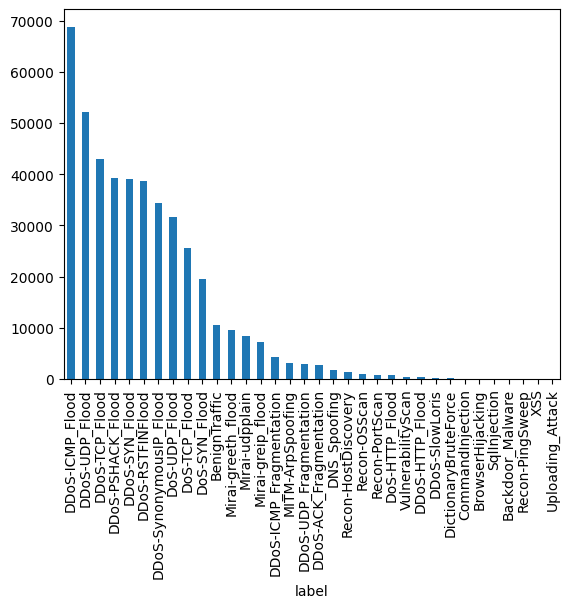

In [24]:
parttime = pd.read_csv('/kaggle/input/unb-cic-iot-dataset/wataiData/csv/CICIoT2023/part-00025-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv')
parttime.label.value_counts().plot.bar()

In [25]:
# df.to_pickle('training_data-X_values.pkl')

<Axes: xlabel='label'>

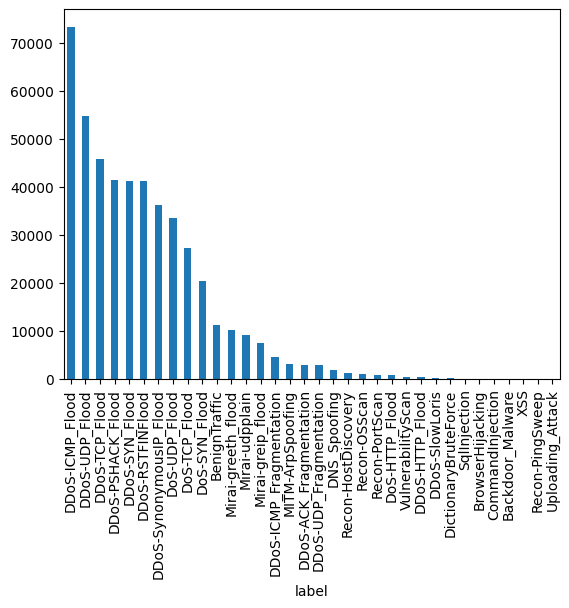

In [26]:
df_p.label.value_counts().plot.bar()

In [27]:
df_p.label.value_counts()

label
DDoS-ICMP_Flood            73334
DDoS-UDP_Flood             54826
DDoS-TCP_Flood             45759
DDoS-PSHACK_Flood          41398
DDoS-SYN_Flood             41262
DDoS-RSTFINFlood           41172
DDoS-SynonymousIP_Flood    36187
DoS-UDP_Flood              33533
DoS-TCP_Flood              27283
DoS-SYN_Flood              20482
BenignTraffic              11262
Mirai-greeth_flood         10239
Mirai-udpplain              9139
Mirai-greip_flood           7549
DDoS-ICMP_Fragmentation     4558
MITM-ArpSpoofing            3111
DDoS-ACK_Fragmentation      2961
DDoS-UDP_Fragmentation      2813
DNS_Spoofing                1808
Recon-HostDiscovery         1322
Recon-OSScan                 970
Recon-PortScan               832
DoS-HTTP_Flood               767
VulnerabilityScan            407
DDoS-HTTP_Flood              300
DDoS-SlowLoris               234
DictionaryBruteForce         154
SqlInjection                  60
BrowserHijacking              59
CommandInjection              48
Back